<a href="https://colab.research.google.com/github/wmchen312/TibameML/blob/main/ML0922regression_%E5%9B%9E%E6%AD%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


CRIM：人均犯罪率

ZN：25,000平方英尺以上民用土地的比例

INDUS：城镇非零售业商用土地比例

CHAS：是否邻近查尔斯河，1是邻近，0是不邻近

NOX：一氧化氮浓度（千万分之一）

RM：住宅的平均房间数

AGE：自住且建于1940年前的房屋比例

DIS：到5个波士顿就业中心的加权距离

RAD：到高速公路的便捷度指数

TAX：每万元的房产税率

PTRATIO：城镇学生教师比例

B： 1000(Bk − 0.63)2 其中Bk是城镇中黑人比例

LSTAT：低收入人群比例

ans：自住房中位数价格，单位是千元

In [ ]:
#上課範例01
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()
df=pd.DataFrame(boston["data"],columns=boston["feature_names"])  #pandas的維度函式 DataFrame=>2D, Serise=>1D
#Series:df["sepal length(cm)"]
df["ans"]=boston["target"]
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ans
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
#進入sklearn以後就不用df, 改用numpy array
import numpy as np
from sklearn.model_selection import train_test_split

y = np.array(df["ans"])
#axis參數
x=np.array(df.drop(["ans"],axis=1))
#train_test_split([1,2,3,4],[5,6,7,8],[9,10,11,12],test_size=0.25) #test_size切幾分, 隨機切, 切相對應位置
#90 % x,10 % x,90 % y,10 % y
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)
#numpy:.shape
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 13)
(51, 13)
(455,)
(51,)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=5)
reg.fit(x_train,y_train) #訓練資料fit

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

[Text(390.6, 665.91, 'RM <= 6.838\nmse = 81.905\nsamples = 455\nvalue = 22.534'),
 Text(195.3, 475.65, 'LSTAT <= 14.4\nmse = 37.63\nsamples = 374\nvalue = 19.706'),
 Text(97.65, 285.39, 'DIS <= 1.385\nmse = 23.746\nsamples = 216\nvalue = 23.127'),
 Text(48.825, 95.13, '\n  (...)  \n'),
 Text(146.47500000000002, 95.13, '\n  (...)  \n'),
 Text(292.95000000000005, 285.39, 'CRIM <= 7.465\nmse = 18.734\nsamples = 158\nvalue = 15.028'),
 Text(244.125, 95.13, '\n  (...)  \n'),
 Text(341.77500000000003, 95.13, '\n  (...)  \n'),
 Text(585.9000000000001, 475.65, 'RM <= 7.437\nmse = 78.836\nsamples = 81\nvalue = 35.594'),
 Text(488.25, 285.39, 'NOX <= 0.659\nmse = 38.626\nsamples = 55\nvalue = 31.26'),
 Text(439.425, 95.13, '\n  (...)  \n'),
 Text(537.075, 95.13, '\n  (...)  \n'),
 Text(683.5500000000001, 285.39, 'CRIM <= 2.742\nmse = 40.117\nsamples = 26\nvalue = 44.762'),
 Text(634.725, 95.13, '\n  (...)  \n'),
 Text(732.375, 95.13, '\n  (...)  \n')]

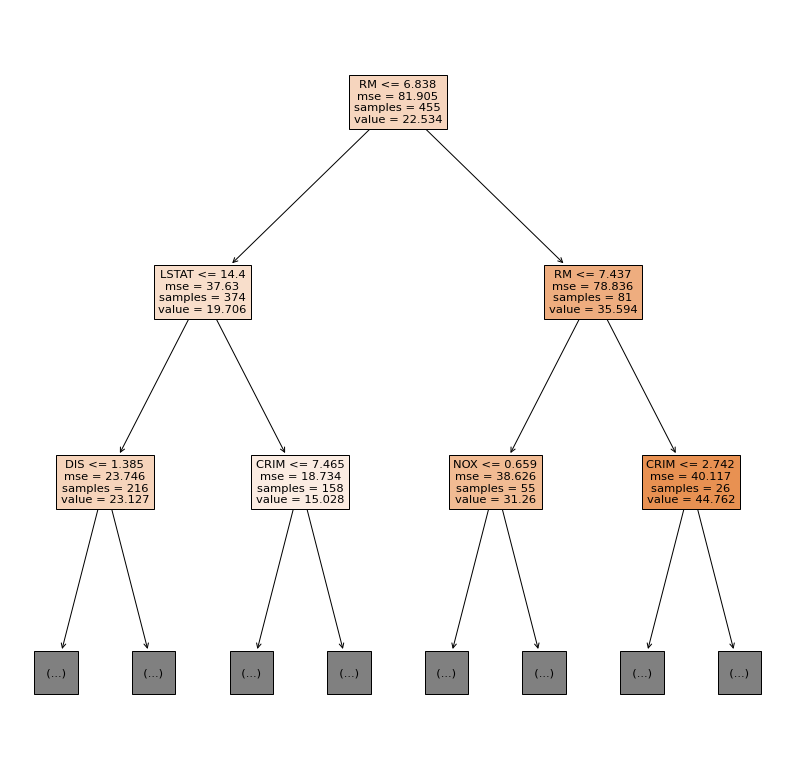

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(14, 14)) 
plot_tree(reg,
     feature_names=boston["feature_names"],
     filled=True,
     max_depth=2)

In [ ]:
from sklearn.metrics import r2_score
pre=reg.predict(x_test)
r2_score(y_test,pre)

0.8083299968604568